# Importing Libraries

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

# Checking for valid encoding to open the given .csv file

In [252]:
alias_set = set(aliases.values())
for current_encoding in alias_set:
    try:
        pd.read_csv('red_blue_data.csv', nrows=5, encoding=current_encoding)
        print(current_encoding)
        break
    except:
        pass

iso8859_7


# Using the above valid encoding to open the csv file

In [253]:
df = pd.read_csv('red_blue_data.csv',encoding='cp864')

# Analysing structure of the given dataframe

In [254]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [255]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [256]:
df.shape

(319073, 17)

# Checking if there are any duplicates and removing them as required

In [257]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319068    False
319069    False
319070    False
319071    False
319072    False
Length: 319073, dtype: bool

In [258]:
df.duplicated().sum()

23

In [259]:
df.shape

(319073, 17)

In [260]:
df.drop_duplicates(inplace=True)

In [261]:
df.shape

(319050, 17)

# Exploring the dataset and making changes as required

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [263]:
df.rename(columns={'OCCURRED_ON_DATE':'DATE'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   DATE                 319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [264]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   DATE                 319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [266]:
df.describe(include='all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,319050,319050.000000,319050,319050,317285,319050,1019,319050,319050.000000,319050.000000,319050,319050.000000,318960,308179,299052.000000,299052.000000,319050
unique,282517,NaN,67,244,12,879,1,NaN,NaN,NaN,7,NaN,4,4657,NaN,NaN,18194
top,I162030584,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,NaN,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,13,NaN,37132,18783,49940,20250,1019,NaN,NaN,NaN,48489,NaN,158537,14192,NaN,NaN,19998
mean,NaN,2317.516957,NaN,NaN,NaN,NaN,NaN,2017-01-25 12:35:59.149211904,2016.560674,6.609622,NaN,13.118176,NaN,NaN,42.214373,-70.908260,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,2015-06-15 00:00:00,2015.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,2016-04-12 03:30:00,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297438,-71.097135,NaN
50%,NaN,2907.000000,NaN,NaN,NaN,NaN,NaN,2017-01-28 04:36:00,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325538,-71.077524,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,2017-11-05 18:39:00,2017.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062467,NaN
max,NaN,3831.000000,NaN,NaN,NaN,NaN,NaN,2018-09-03 21:25:00,2018.000000,12.000000,NaN,23.000000,NaN,NaN,42.395042,-1.000000,NaN


In [267]:
df.columns[df.isnull().sum()!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [268]:
df.columns[df.isnull().sum()==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [269]:
df.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
DATE                   233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

# Analysing the given data

In [270]:
#Let's see which are the most common crimes

In [271]:
df1 = df[['OFFENSE_CODE_GROUP','INCIDENT_NUMBER']].groupby('OFFENSE_CODE_GROUP').count()
df1 = df1.reset_index('OFFENSE_CODE_GROUP').sort_values('INCIDENT_NUMBER', ascending=False)[:10]

Text(0.5, 1.0, 'Most Common Crimes')

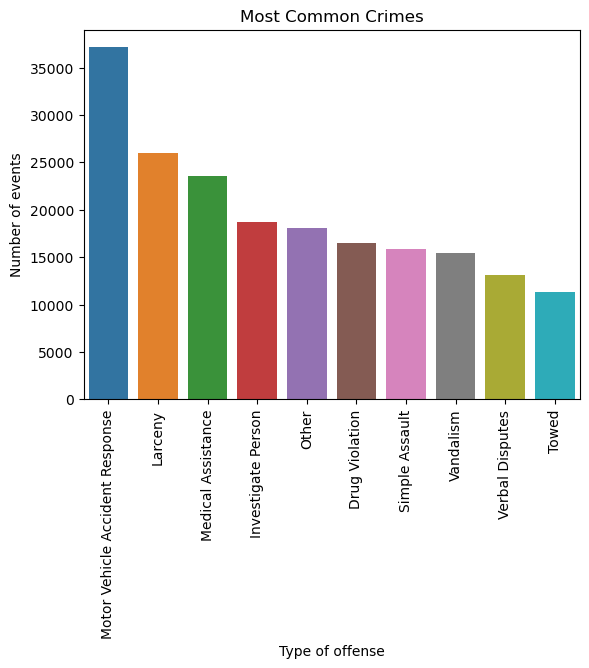

In [272]:
sns.barplot(df1, x='OFFENSE_CODE_GROUP', y='INCIDENT_NUMBER')
plt.xticks(rotation=90)
plt.xlabel('Type of offense')
plt.ylabel('Number of events')
plt.title('Most Common Crimes')

In [273]:
# Let's see least common ones

In [274]:
df2 = df[['OFFENSE_CODE_GROUP','INCIDENT_NUMBER']].groupby('OFFENSE_CODE_GROUP').count()
df2 = df2.reset_index('OFFENSE_CODE_GROUP').sort_values('INCIDENT_NUMBER')[:10]

Text(0.5, 1.0, 'Least Common Crimes')

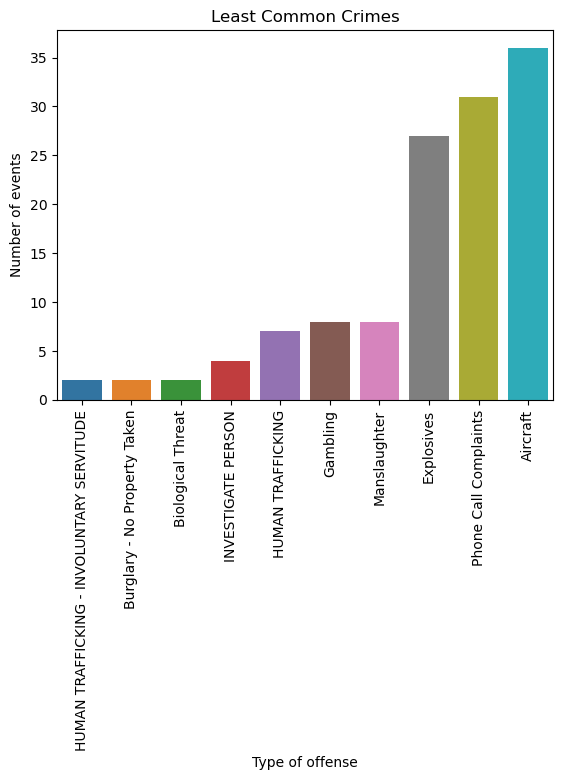

In [275]:
sns.barplot(df2, x='OFFENSE_CODE_GROUP', y='INCIDENT_NUMBER')
plt.xticks(rotation=90)
plt.xlabel('Type of offense')
plt.ylabel('Number of events')
plt.title('Least Common Crimes')

In [276]:
# Let's see the most common offense descriptions

In [277]:
df3 = df[['OFFENSE_DESCRIPTION','INCIDENT_NUMBER']].groupby('OFFENSE_DESCRIPTION').count()
df3 = df3.reset_index('OFFENSE_DESCRIPTION').sort_values('INCIDENT_NUMBER', ascending=False)[:7]

Text(0.5, 1.0, 'Most reported offense description and their share')

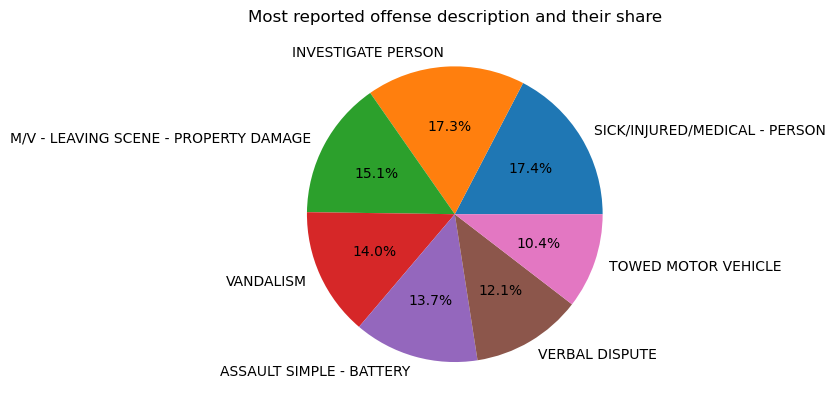

In [310]:
plt.pie(df3['INCIDENT_NUMBER'], labels=df3['OFFENSE_DESCRIPTION'], autopct='%1.1f%%')
plt.title('Most reported offense description and their share')

In [279]:
# Let's see the number of crimes committed every year

In [280]:
df4 = df[['YEAR','INCIDENT_NUMBER']].groupby('YEAR').count()
df4 = df4.reset_index('YEAR')

Text(0.5, 1.0, 'Events per year')

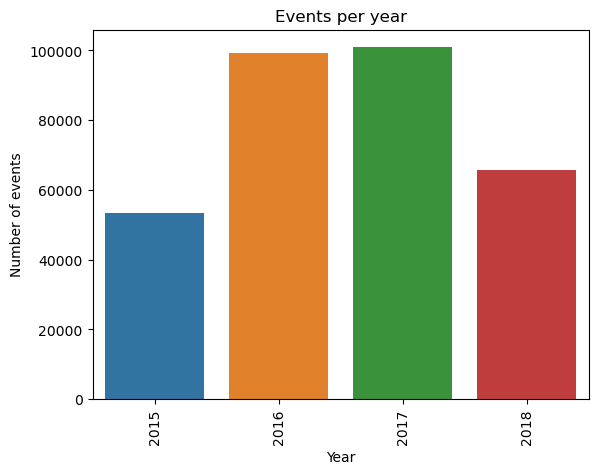

In [309]:
sns.barplot(df4, x='YEAR', y='INCIDENT_NUMBER')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of events')
plt.title('Events per year')

In [282]:
# Which days have more activity then usual

In [291]:
df5 = df[['DAY_OF_WEEK','INCIDENT_NUMBER']].groupby('DAY_OF_WEEK').count()
df5 = df5.reset_index('DAY_OF_WEEK').sort_values('INCIDENT_NUMBER')

Text(0.5, 1.0, 'Activity per day')

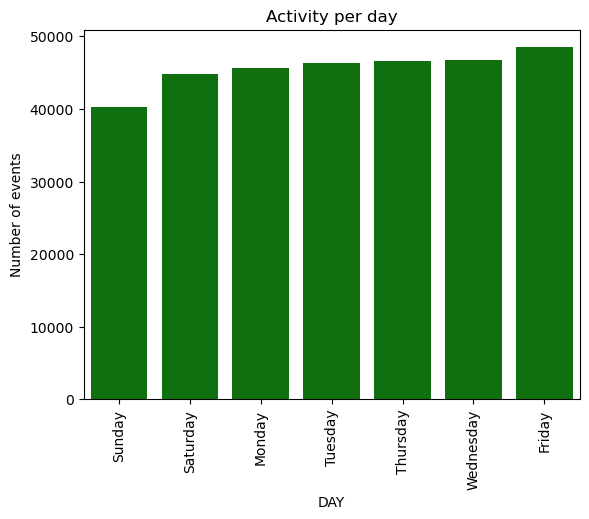

In [311]:
sns.barplot(df5, x='DAY_OF_WEEK', y='INCIDENT_NUMBER', color='g')
plt.xticks(rotation=90)
plt.xlabel('DAY')
plt.ylabel('Number of events')
plt.title('Activity per day')

In [297]:
# What time of day are people more susceptible

In [298]:
df6 = df[['HOUR','INCIDENT_NUMBER']].groupby('HOUR').count()
df6 = df6.reset_index('HOUR').sort_values('INCIDENT_NUMBER')

Text(0.5, 1.0, 'Activity by hour')

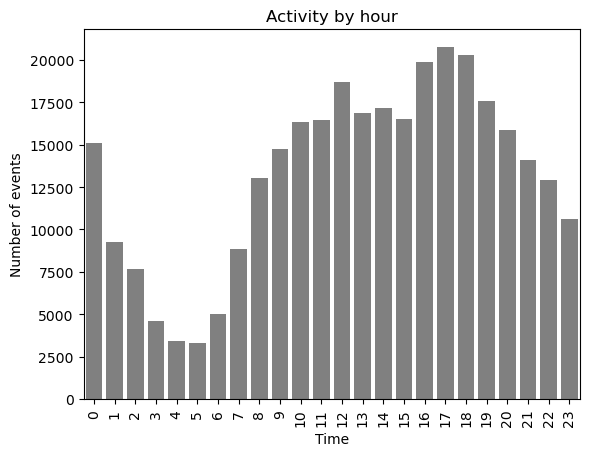

In [299]:
sns.barplot(df6, x='HOUR', y='INCIDENT_NUMBER', color='grey')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of events')
plt.title('Activity by hour')

In [300]:
# summarising the time frame when most crimes are commited

Text(50.722222222222214, 0.5, 'Time')

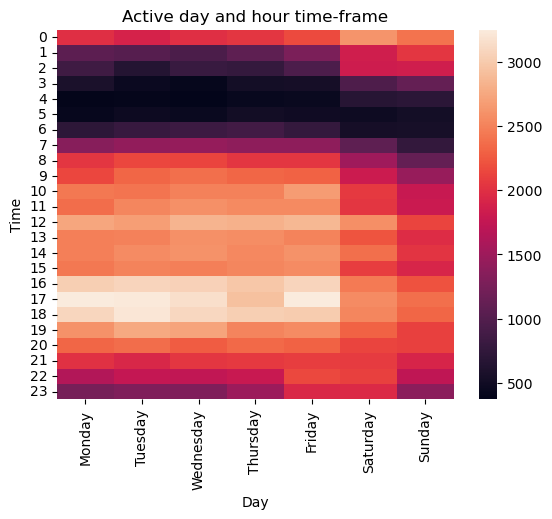

In [301]:
hour_and_day = df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
hour_and_day = hour_and_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sns.heatmap(hour_and_day)
plt.title('Active day and hour time-frame')
plt.xlabel('Day')
plt.ylabel('Time')

In [302]:
#Let's take a look at months with above average crime count

In [307]:
avg_crime = df.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes per month is " + str(round(avg_crime)))
print("The months with above average crime rate are marked in red")
year_and_month = df.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
def style_negative(v, props=''):
    return props if v > avg_crime else None
above_average_months = year_and_month.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
above_average_months

The average number of crimes per month is 7976
The months with above average crime rate are marked in red


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000
